In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, zscore

# Global Air Quality Dataset

## 1. Introduction: Describing and Importing the Dataset

### The Dataset

*****Brief description of the dataset... data from 2023

Description of each columnin the dataset:<br>
- **City:** The name of the city where the air quality measurement was taken.<br>
- **Country:** The country in which the city is located.<br>
- **Date:** The date when the measurement was recorded (yyyy-mm-dd).<br>
- **PM2.5:** The concentration of fine particulate matter with a diameter of less than 2.5 micrometers (µg/m³).<br>
- **PM10:** The concentration of particulate matter with a diameter of less than 10 micrometers (µg/m³).<br>
- **NO2:** The concentration of nitrogen dioxide (µg/m³).<br>
- **SO2:** The concentration of sulfur dioxide (µg/m³).<br>
- **CO:** The concentration of carbon monoxide (mg/m³).<br>
- **O3:** The concentration of ozone (µg/m³).<br>
- **Temperature:** The temperature at the time of measurement (°C).<br>
- **Humidity:** The humidity level at the time of measurement (%).<br>
- **Wind Speed:** The wind speed at the time of measurement (m/s).<br>

### Objectives of the Project

**Contents:**

- **Summary Statistics**
- **Univariate Analysis:** examining single variables
- **Bivariate Analysis:** comparing Two Variables
- **Multivariate Analysis:** Examining Multiple Variables Together

### Importance of Air Quality Analysis

### Importing the Dataset

In [2]:
df = pd.read_csv('C:/Users/james/james-jarman-portfolio/Python_Project/data/global_air_quality_data_10000.csv')

df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


## 2. Data Exploration and Cleaning

After viewing the first few rows of the dataset we...

In [3]:
print("The dataset has",df.shape[0],"rows and",df.shape[1],"columns.")

The dataset has 10000 rows and 12 columns.


In [4]:
print("The number of null/missing values in each column:")
df.isnull().sum()

The number of null/missing values in each column:


City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

In [5]:
print("The number of duplicate rows in the dataset is:",df.duplicated().sum())

The number of duplicate rows in the dataset is: 0


In [6]:
print("The original data type of each column is:")      
df.dtypes

The original data type of each column is:


City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object

In [7]:
# Converting the Date data type from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
print("The new data type for the 'Date' column is:",df['Date'].dtype)

The new data type for the 'Date' column is: datetime64[ns]


In [8]:
# Adding additional columns for the year and month of each entry.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Rearranging the columns so that the new Year and Month columns come immediately after the Date column.

columns = df.columns.tolist()

new_order = [col for col in columns if col not in ['Year', 'Month', 'Date']]
new_order = new_order[:2] + ['Date', 'Year', 'Month'] + new_order[2:]

df = df[new_order]

df.head()

,City,Country,Date,Year,Month,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,2023,3,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,2023,2,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,2023,11,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,2023,3,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,2023,4,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [9]:
df = df.sort_values(by="Date", ascending=True).reset_index(drop=True)
df

,City,Country,Date,Year,Month,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-01-01,2023,1,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89
1,Rio de Janeiro,Brazil,2023-01-01,2023,1,52.43,76.80,46.99,13.02,8.41,184.43,20.31,63.21,0.71
2,Cairo,Egypt,2023-01-01,2023,1,115.16,73.60,53.68,23.44,6.33,156.81,4.12,37.98,11.75
3,Istanbul,Turkey,2023-01-01,2023,1,86.32,177.30,80.24,30.32,8.76,86.34,23.66,96.27,0.87
4,Rio de Janeiro,Brazil,2023-01-01,2023,1,10.24,118.73,51.87,39.72,4.61,136.18,9.69,27.61,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Beijing,China,2023-12-28,2023,12,65.78,32.82,60.07,34.81,5.66,30.42,9.05,77.67,12.60
9996,Berlin,Germany,2023-12-28,2023,12,118.27,195.53,84.32,5.25,1.82,66.84,11.80,52.10,1.05
9997,Seoul,South Korea,2023-12-28,2023,12,26.77,52.08,48.29,13.14,7.67,94.26,28.40,26.50,1.99
9998,Paris,France,2023-12-28,2023,12,122.20,95.50,58.98,24.59,9.41,194.09,-1.67,98.48,19.32


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         10000 non-null  object        
 1   Country      10000 non-null  object        
 2   Date         10000 non-null  datetime64[ns]
 3   Year         10000 non-null  int32         
 4   Month        10000 non-null  int32         
 5   PM2.5        10000 non-null  float64       
 6   PM10         10000 non-null  float64       
 7   NO2          10000 non-null  float64       
 8   SO2          10000 non-null  float64       
 9   CO           10000 non-null  float64       
 10  O3           10000 non-null  float64       
 11  Temperature  10000 non-null  float64       
 12  Humidity     10000 non-null  float64       
 13  Wind Speed   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int32(2), object(2)
memory usage: 1015.8+ KB


Creating an index object of the numerical columns for analysis.

In [11]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

Checking for outliers in each of the numerical columns.

In [12]:
df_z = df[numerical_columns]

z_scores = np.abs(zscore(df_z))

outlier_threshold = 3
outliers_z = (z_scores > outlier_threshold)

for i, column in enumerate(df_z.columns):
    outliers = np.sum(outliers_z[:, i])
    print(f"Outliers for {column}: {outliers}")

Outliers for PM2.5: 0
Outliers for PM10: 0
Outliers for NO2: 0
Outliers for SO2: 0
Outliers for CO: 0
Outliers for O3: 0
Outliers for Temperature: 0
Outliers for Humidity: 0
Outliers for Wind Speed: 0


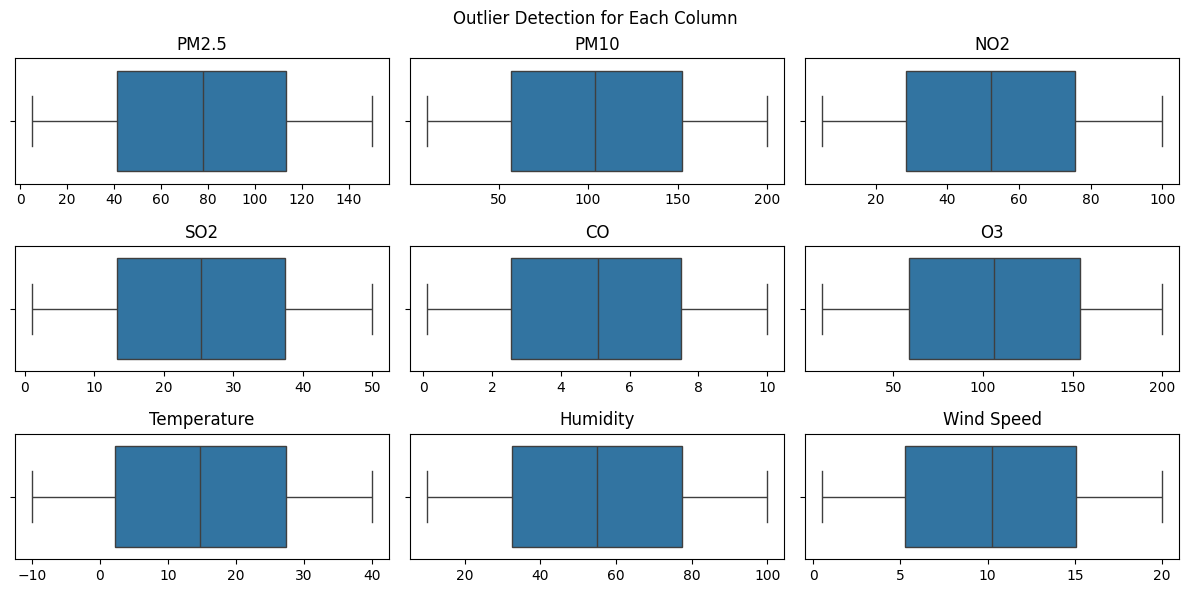

In [13]:
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(12, 6))
plt.suptitle('Outlier Detection for Each Column')

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.xlabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

No missing entries, no duplicates and no outliers, hence no further cleaning required and we can move onto EDA.

## 3. Exploratory Data Analysis (EDA)

Defining a map for each numerical column to a specific colour (for consistency throughout project).

In [14]:
# Defining colour palette for all numerical columns.

num_colors1 = len(numerical_columns)
colors1 = sns.color_palette("tab10", num_colors1)

color_dict1 = dict(zip(numerical_columns, colors1))

In [15]:
air_quality_metrics = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

# Defining colour palette for all air quality metric columns.

num_colors2 = len(air_quality_metrics)
colors2 = sns.color_palette("tab10", num_colors2)

color_dict2 = dict(zip(air_quality_metrics, colors2))

### Univariate Analysis

Questions we want to answer:
- What are the summary statistics (mean, median, standard deviation) for different air quality indicators (PM2.5, PM10, NO2, SO2, CO, O3)?
- What is the distribution of PM2.5 concentrations globally? Is it skewed?
- What is the most common Air Quality Index (AQI) category in the dataset?
- How does the AQI vary across different seasons?

#### Summary Statistics:

In [16]:
df.describe(include='all')

,City,Country,Date,Year,Month,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000,10000,10000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
unique,20,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,540,962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2023-06-29 00:28:56.640000,2023.0,6.471900,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
min,NaN,NaN,2023-01-01 00:00:00,2023.0,1.000000,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,NaN,NaN,2023-03-28 00:00:00,2023.0,3.000000,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,NaN,NaN,2023-06-27 00:00:00,2023.0,6.000000,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,NaN,NaN,2023-09-27 00:00:00,2023.0,9.000000,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,NaN,NaN,2023-12-28 00:00:00,2023.0,12.000000,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [17]:
print("The key summary statistics for the different air quality indicators are:")
stats = df.describe().loc[['mean', '50%', 'std', 'min','max'],air_quality_metrics].rename(index={'50%': 'median'})
stats

The key summary statistics for the different air quality indicators are:


,PM2.5,PM10,NO2,SO2,CO,O3
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643
median,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000


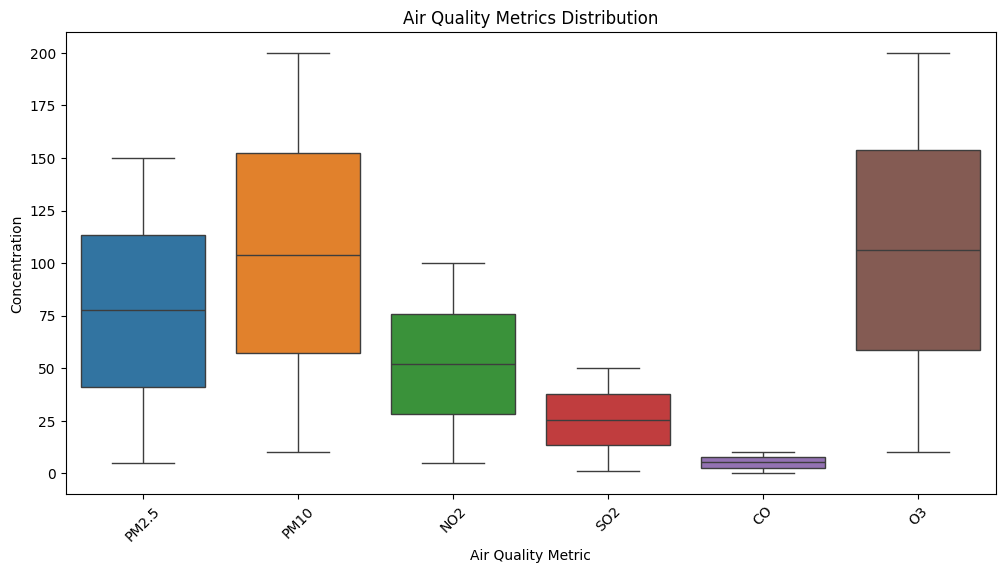

In [18]:
df_long = df.melt(value_vars=air_quality_metrics,
                  var_name='Air Quality Metric', value_name='Concentration')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Air Quality Metric', y='Concentration', data=df_long, 
            hue='Air Quality Metric', palette=color_dict2, legend=False)

plt.title('Air Quality Metrics Distribution')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

#### Distribution Analysis

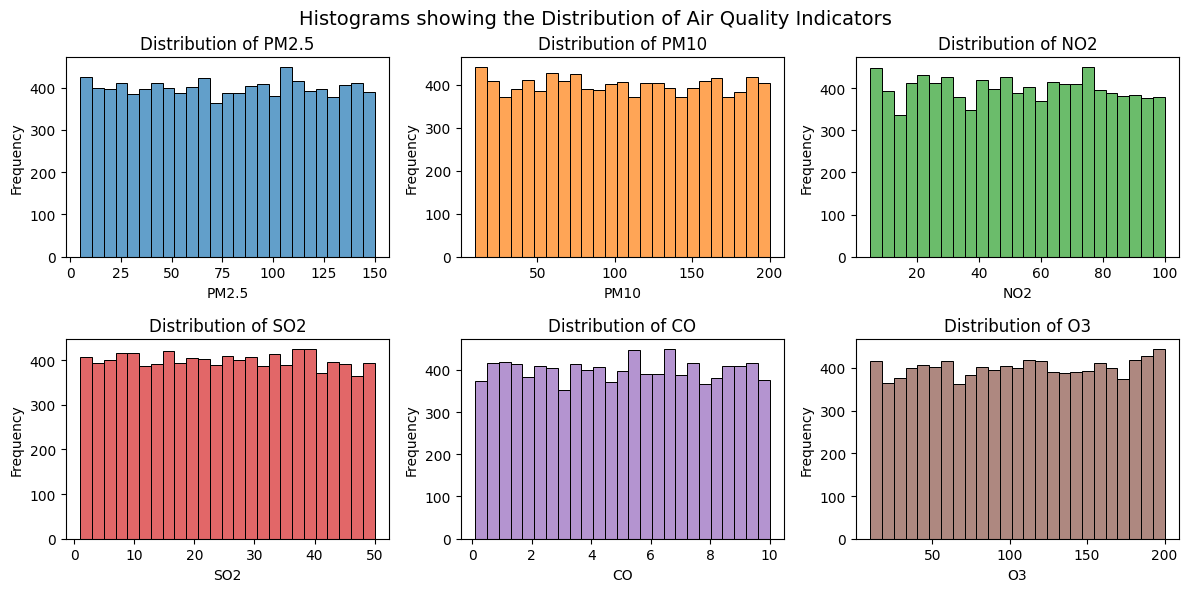

In [19]:
plt.figure(figsize=(12, 6))
plt.suptitle('Histograms showing the Distribution of Air Quality Indicators', fontsize=14)

for i, col in enumerate(air_quality_metrics, 1):
    plt.subplot(2, 3, i)  # Create a 3x3 grid for subplots
    sns.histplot(df[col], bins=25, alpha=0.7, color=color_dict2[col], edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

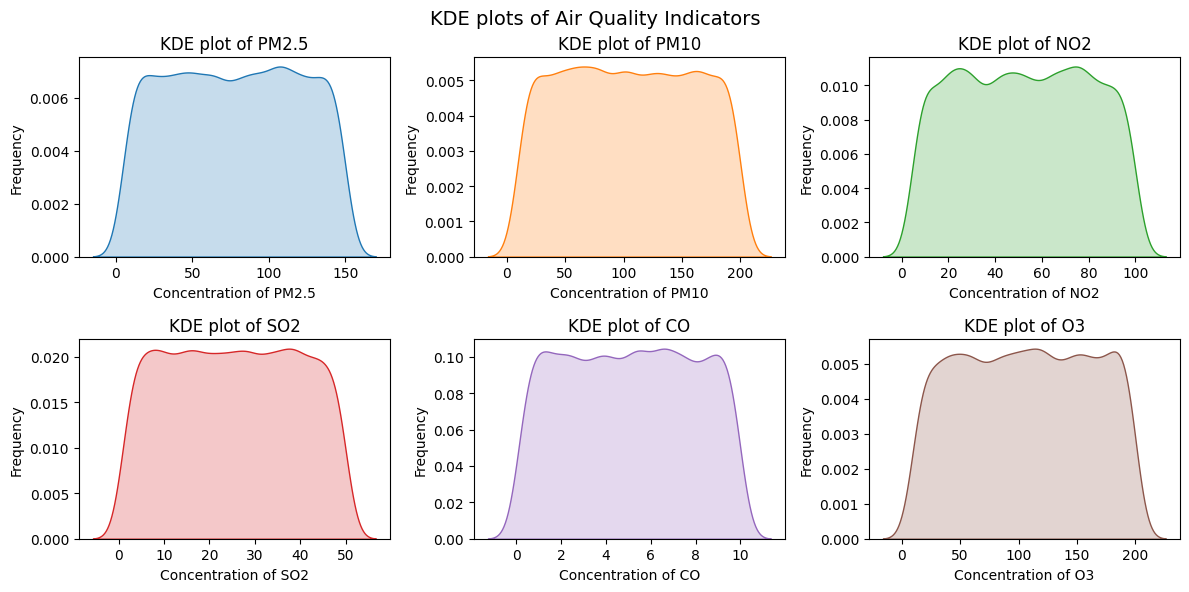

In [54]:
plt.figure(figsize=(12, 6))
plt.suptitle('KDE plots of Air Quality Indicators', fontsize=14)

for i, col in enumerate(air_quality_metrics, 1):
    plt.subplot(2, 3, i)  # Create a 3x3 grid for subplots
    sns.kdeplot(df[col], fill=True, color=color_dict2[col])
    plt.title(f'KDE plot of {col}')
    plt.xlabel(f'Concentration of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [20]:
skewness_dict = {}

for metric in air_quality_metrics:
    skewness_dict[metric] = skew(df[metric].dropna())

skewness_df = pd.DataFrame(list(skewness_dict.items()), columns=['Metric', 'Skewness'])
print(skewness_df)

  Metric  Skewness
0  PM2.5 -0.005623
1   PM10  0.011102
2    NO2 -0.001779
3    SO2  0.007405
4     CO -0.002403
5     O3 -0.014034


#### AQI Data Synthesis and Analysis

In [21]:
import pandas as pd

def calculate_aqi(concentration, C_low, C_high, I_low, I_high):
    """
    Calculate AQI for a given concentration using the breakpoint values.
    """
    return ((concentration - C_low) * (I_high - I_low)) / (C_high - C_low) + I_low

def calculate_aqi_pm25(concentration):
    # PM2.5 breakpoints (Example for U.S. standards)
    breakpoints = [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 500.4)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

def calculate_aqi_pm10(concentration):
    # PM10 breakpoints (Example for U.S. standards)
    breakpoints = [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 604)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

def calculate_aqi_no2(concentration):
    # NO2 breakpoints (Example for U.S. standards)
    breakpoints = [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 2049)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

def calculate_aqi_so2(concentration):
    # SO2 breakpoints (Example for U.S. standards)
    breakpoints = [(0, 35), (36, 75), (76, 185), (186, 304), (305, 604), (605, 804)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

def calculate_aqi_co(concentration):
    # CO breakpoints (Example for U.S. standards)
    breakpoints = [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 50.4)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

def calculate_aqi_o3(concentration):
    # O3 breakpoints (Example for U.S. standards)
    breakpoints = [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 604)]
    aqi_ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]
    
    for (C_low, C_high), (I_low, I_high) in zip(breakpoints, aqi_ranges):
        if C_low <= concentration <= C_high:
            return calculate_aqi(concentration, C_low, C_high, I_low, I_high)
    return None

# Apply the AQI calculation functions
df['AQI_PM25'] = df['PM2.5'].apply(calculate_aqi_pm25)
df['AQI_PM10'] = df['PM10'].apply(calculate_aqi_pm10)
df['AQI_NO2'] = df['NO2'].apply(calculate_aqi_no2)
df['AQI_SO2'] = df['SO2'].apply(calculate_aqi_so2)
df['AQI_CO'] = df['CO'].apply(calculate_aqi_co)
df['AQI_O3'] = df['O3'].apply(calculate_aqi_o3)

# Calculate overall AQI by taking the max AQI value from all pollutants
df['Overall_AQI'] = df[['AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3']].max(axis=1)

# View the results
df.head()

,City,Country,Date,Year,Month,PM2.5,PM10,NO2,SO2,CO,...,Temperature,Humidity,Wind Speed,AQI_PM25,AQI_PM10,AQI_NO2,AQI_SO2,AQI_CO,AQI_O3,Overall_AQI
0,Bangkok,Thailand,2023-01-01,2023,1,146.15,17.85,8.16,26.30,6.47,...,-2.45,40.91,18.89,197.805585,16.527778,7.698113,37.571429,70.7,29.703704,197.805585
1,Rio de Janeiro,Brazil,2023-01-01,2023,1,52.43,76.80,46.99,13.02,8.41,...,20.31,63.21,0.71,142.686935,61.789899,44.330189,18.600000,90.1,283.601809,283.601809
2,Cairo,Egypt,2023-01-01,2023,1,115.16,73.60,53.68,23.44,6.33,...,4.12,37.98,11.75,181.804426,60.206061,NaN,33.485714,69.3,254.512660,254.512660
3,Istanbul,Turkey,2023-01-01,2023,1,86.32,177.30,80.24,30.32,8.76,...,23.66,96.27,0.87,166.913383,112.037374,78.951304,43.314286,93.6,151.876842,166.913383
4,Rio de Janeiro,Brazil,2023-01-01,2023,1,10.24,118.73,51.87,39.72,4.61,...,9.69,27.61,3.52,42.666667,82.543131,48.933962,55.673846,52.1,232.785319,232.785319


In [35]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for\n Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

df['AQI_Category'] = df['Overall_AQI'].apply(categorize_aqi)
df.head()

,City,Country,Date,Year,Month,PM2.5,PM10,NO2,SO2,CO,...,Humidity,Wind Speed,AQI_PM25,AQI_PM10,AQI_NO2,AQI_SO2,AQI_CO,AQI_O3,Overall_AQI,AQI_Category
0,Bangkok,Thailand,2023-01-01,2023,1,146.15,17.85,8.16,26.30,6.47,...,40.91,18.89,197.805585,16.527778,7.698113,37.571429,70.7,29.703704,197.805585,Unhealthy
1,Rio de Janeiro,Brazil,2023-01-01,2023,1,52.43,76.80,46.99,13.02,8.41,...,63.21,0.71,142.686935,61.789899,44.330189,18.600000,90.1,283.601809,283.601809,Very Unhealthy
2,Cairo,Egypt,2023-01-01,2023,1,115.16,73.60,53.68,23.44,6.33,...,37.98,11.75,181.804426,60.206061,NaN,33.485714,69.3,254.512660,254.512660,Very Unhealthy
3,Istanbul,Turkey,2023-01-01,2023,1,86.32,177.30,80.24,30.32,8.76,...,96.27,0.87,166.913383,112.037374,78.951304,43.314286,93.6,151.876842,166.913383,Unhealthy
4,Rio de Janeiro,Brazil,2023-01-01,2023,1,10.24,118.73,51.87,39.72,4.61,...,27.61,3.52,42.666667,82.543131,48.933962,55.673846,52.1,232.785319,232.785319,Very Unhealthy


In [36]:
most_common_aqi_category = df['AQI_Category'].value_counts().idxmax()
print(f"The most common AQI category is: {most_common_aqi_category}")

The most common AQI category is: Very Unhealthy


In [37]:
# Define the order of AQI categories
category_order = ["Good", "Moderate", "Unhealthy for\n Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

# Apply the ordered category type to your AQI Category column
df['AQI_Category'] = pd.Categorical(df['AQI_Category'], categories=category_order, ordered=True)

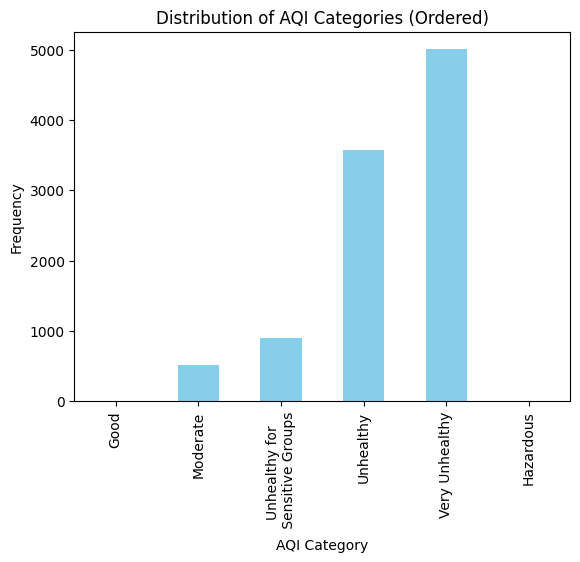

In [38]:
# Plot the distribution of AQI categories, ordered from Good to Hazardous
df['AQI_Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of AQI Categories (Ordered)')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'date' column to create a new 'Season' column
df['Season'] = df['Date'].dt.month.apply(get_season)

In [41]:
# Group by season and calculate the average AQI
seasonal_aqi = df.groupby('Season')['Overall_AQI'].mean()

# Display the result
print(seasonal_aqi)

Season
Fall      205.442707
Spring    204.544682
Summer    203.915494
Winter    204.630498
Name: Overall_AQI, dtype: float64


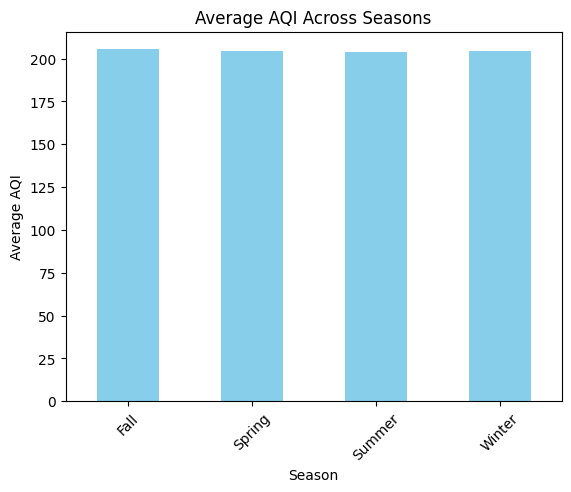

In [42]:
# Plot the average AQI for each season
seasonal_aqi.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average AQI Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

#### Insights

### Bivariate Analysis

Questions we want to answer:
- How does PM2.5 correlate with PM10, NO2, CO, O3, and SO2?
- Is there a relationship between temperature and AQI?
- Does humidity have an impact on pollution levels?
- How does wind speed affect pollutant levels?
- Do higher temperatures correlate with lower air pollution levels?


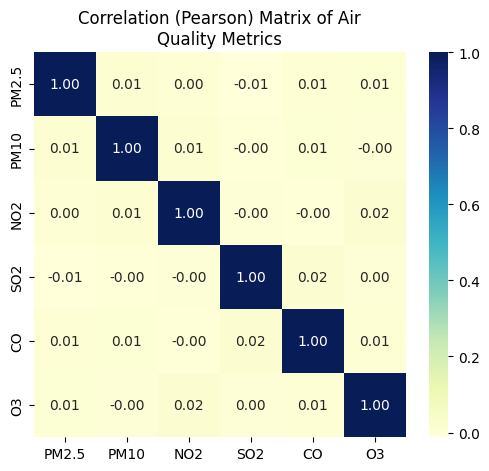

In [79]:
correlation_matrix = df[air_quality_metrics].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation (Pearson) Matrix of Air\nQuality Metrics')
plt.show()

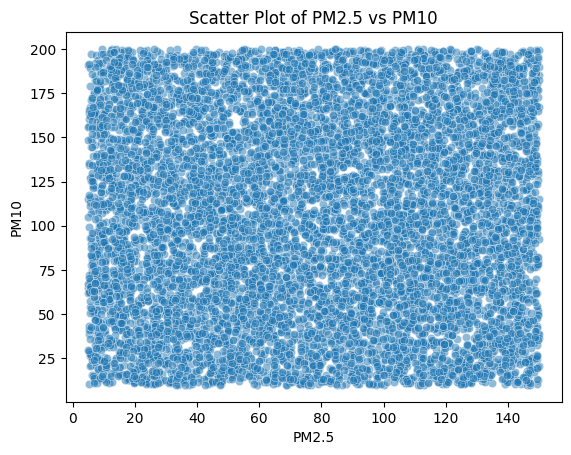

In [59]:
sns.scatterplot(x=df["PM2.5"], y=df["PM10"], alpha=0.5)
plt.title("Scatter Plot of PM2.5 vs PM10")
plt.show()

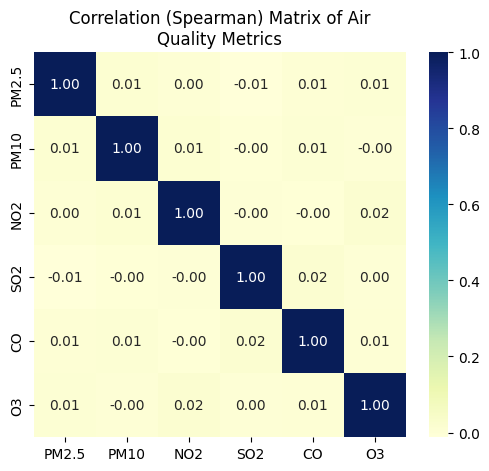

In [78]:
correlation_matrix_spearman = df[air_quality_metrics].corr(method='spearman')

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation (Spearman) Matrix of Air\nQuality Metrics')
plt.show()

No correlation between any air quality metrics.

### Geographical Analysis

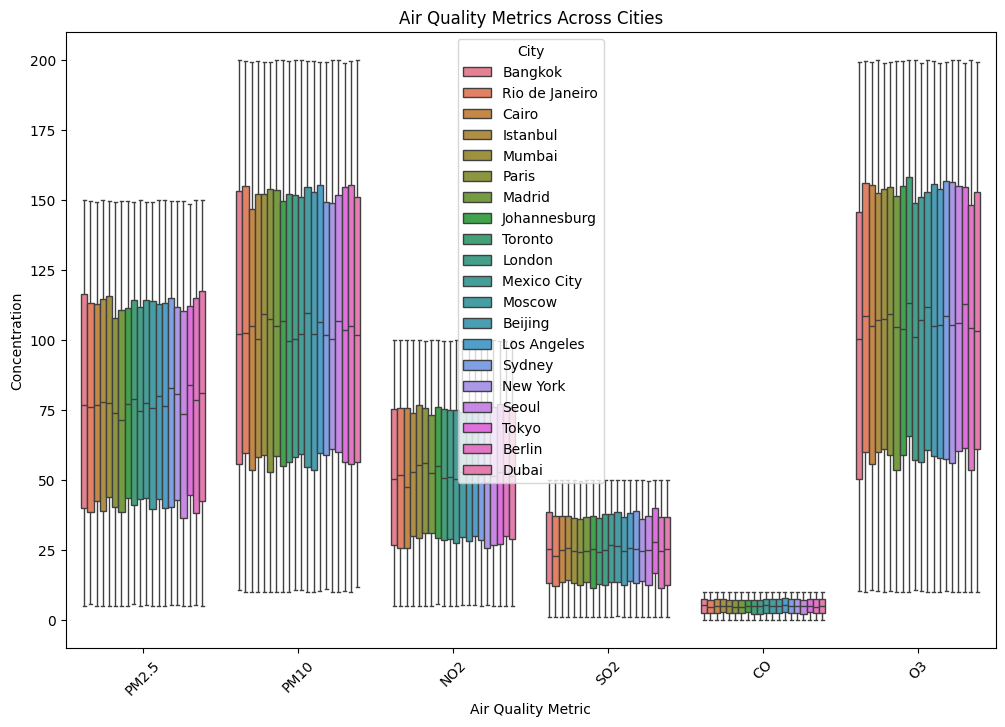

In [23]:
df_long = df.melt(id_vars=['City'], value_vars=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'],
                 var_name='Air Quality Metric', value_name='Concentration')

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Air Quality Metric', y='Concentration', hue='City', data=df_long)

# Add title and labels
plt.title('Air Quality Metrics Across Cities')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

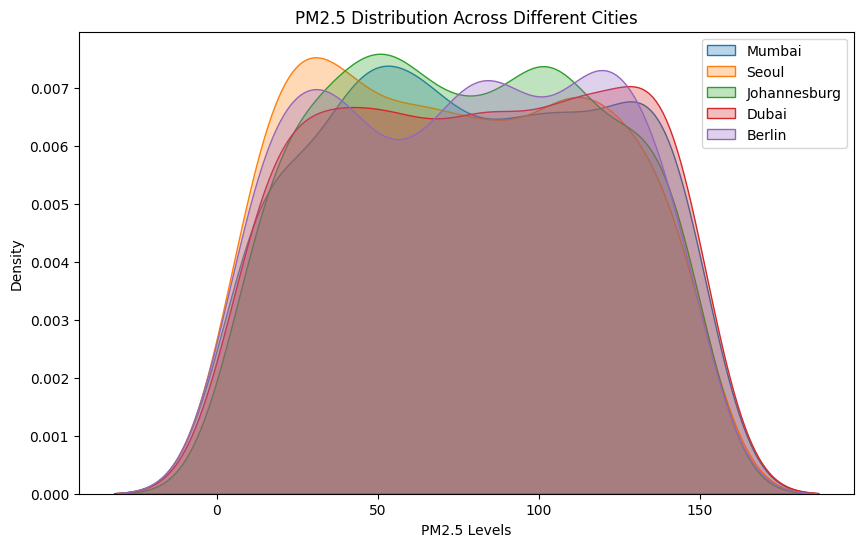

In [51]:
# Filter cities with enough data points (optional)
cities = df['City'].value_counts().index[:5]  # Select top 10 cities by data count

# Plot KDE for each city
plt.figure(figsize=(10,6))
for city in cities:
    sns.kdeplot(df[df['City'] == city]['PM2.5'], label=city, fill=True, alpha=0.3)

plt.title("PM2.5 Distribution Across Different Cities")
plt.xlabel("PM2.5 Levels")
plt.ylabel("Density")
plt.legend()
plt.show()